In [2]:
import numpy as np
import os
import mediapipe as mp
from matplotlib import pyplot as plt
import cv2
from keras.models import load_model

In [2]:
model2 = load_model("Model\model2_alphabet.h5")
model1 = load_model("Model\model_gestures.h5")

In [3]:
PATH = os.path.join('alpha')
actions = np.array(os.listdir(PATH))
label_map={label:num for num,label in enumerate(actions)}
la = [i for i in label_map]
print(label_map)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}


In [4]:
import random
act_len=len(actions)
no_sequences = 30 #30 vids for each action
sequence_length = 15
l=[i for i in range(30)]
aux=l.copy()

In [5]:
feat,labels = [],[]
for act in actions:
    l=aux.copy()
    for _ in range(6):
        seq = random.choice(l)
        l.remove(seq)
        window=[]
        for frame in range(sequence_length):
            res = np.load(os.path.join(PATH,act,str(seq),f"{frame}.npy"))
            window.append(res)
        feat.append(window)
        labels.append(label_map[act])

In [6]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [7]:
from keras.utils import to_categorical

X=np.array(feat)
y=to_categorical(labels).astype(int)

In [10]:
yhat = model2.predict(X)

5/5 [==============================] - 3s 33ms/step


In [11]:
ytrue = np.argmax(y, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [12]:
print(f"Accuracy of Alpha Model:{accuracy_score(ytrue, yhat)*100}")

Accuracy of Alpha Model:98.07692307692307


In [13]:
import seaborn as sb
import matplotlib
import matplotlib.pyplot as pt

Text(0.5, 0.98, 'Plot of confusion matrix')

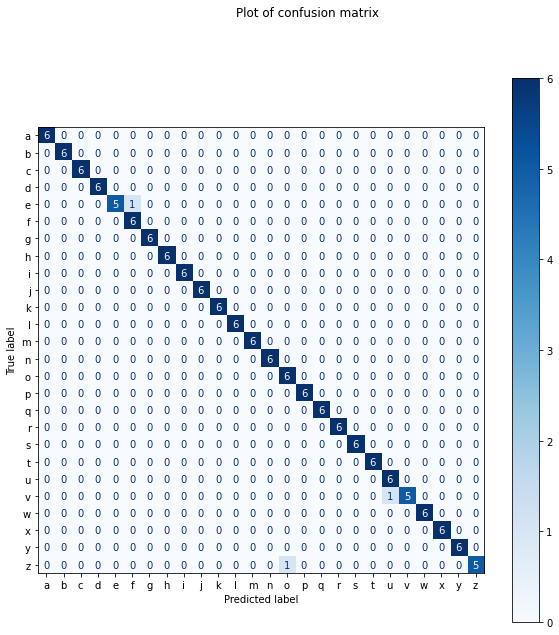

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd
disp = cmd.from_predictions(
                            ytrue, 
                            yhat, 
                            display_labels=la, 
                            cmap=plt.cm.Blues
                            ) 
fig = disp.figure_
fig.set_figwidth(10)
fig.set_figheight(10) 
fig.suptitle('Plot of confusion matrix')

In [16]:
cm=confusion_matrix(ytrue,yhat)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print("recall:",TPR)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# print("true neg rate:",TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print("Precision:",PPV)
# Negative predictive value
NPV = TN/(TN+FN)
# print("Neg pred value:",NPV)
# Fall out or false positive rate
# FPR = FP/(FP+TN)
# print("Fall out:",FPR)
# False negative rate
FNR = FN/(TP+FN)
# print("False neg rate;",FNR)
# False discovery rate
FDR = FP/(TP+FP)
# print("False discovery rate:",FDR)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print("Accuracy:",ACC)

recall: [1.         1.         1.         1.         0.83333333 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.83333333 1.         1.
 1.         0.83333333]
Precision: [1.         1.         1.         1.         1.         0.85714286
 1.         1.         1.         1.         1.         1.
 1.         1.         0.85714286 1.         1.         1.
 1.         1.         0.85714286 1.         1.         1.
 1.         1.        ]
Accuracy: [1.         1.         1.         1.         0.99358974 0.99358974
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99358974 1.         1.         1.
 1.         1.         0.99358974 0.99358974 1.         1.
 1.         0.99358974]


In [3]:
PATH = os.path.join('alpha')
res = np.load(os.path.join(PATH,"a","10",f"{5}.npy"))
print(res)

[ 2.93657392e-01  4.71333027e-01 -3.20611633e-07  3.45708847e-01
  4.26990926e-01 -1.27481753e-02  3.80655646e-01  3.70811790e-01
 -1.76134706e-02  3.93751085e-01  3.17959726e-01 -2.39564460e-02
  3.94847035e-01  2.73320019e-01 -2.86400802e-02  3.49645048e-01
  3.07537317e-01  1.58870558e-03  3.65843236e-01  2.95021743e-01
 -2.10939702e-02  3.56685549e-01  3.42620462e-01 -3.84127349e-02
  3.43559206e-01  3.78676653e-01 -4.54869270e-02  3.18095624e-01
  2.98216164e-01  1.49417191e-03  3.32324684e-01  2.97210246e-01
 -1.86218079e-02  3.25404406e-01  3.49854320e-01 -2.75105573e-02
  3.17811459e-01  3.87184948e-01 -2.83832159e-02  2.88304895e-01
  2.98624039e-01 -2.29554879e-03  3.01445633e-01  3.00909102e-01
 -2.18070783e-02  2.98930436e-01  3.52477491e-01 -1.95095148e-02
  2.95433491e-01  3.89105231e-01 -1.14356782e-02  2.58307815e-01
  3.06256533e-01 -7.48420553e-03  2.71190137e-01  3.01449835e-01
 -1.81638692e-02  2.75236934e-01  3.43310833e-01 -1.16487099e-02
  2.76078641e-01  3.73488